retail sales analysis

analyze sales trends, seasonal patterns and best performing categories

build time series plots and bar charts to summarize insights

In [ ]:
# Install required libraries if not installed
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
if (!requireNamespace("lubridate", quietly = TRUE)) install.packages("lubridate")
if (!requireNamespace("scales", quietly = TRUE)) install.packages("scales")

library(ggplot2)
library(dplyr)
library(lubridate)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
# Read the dataset
sales_data <- read.csv("Superstore.csv")

# Convert Order Date to Date format
sales_data$Order.Date <- as.Date(sales_data$Order.Date, format = "%m/%d/%Y")

# Extract Year and Month
sales_data$Year <- year(sales_data$Order.Date)
sales_data$Month <- month(sales_data$Order.Date, label = TRUE, abbr = TRUE)

# Convert Category to Factor
sales_data$Category <- as.factor(sales_data$Category)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


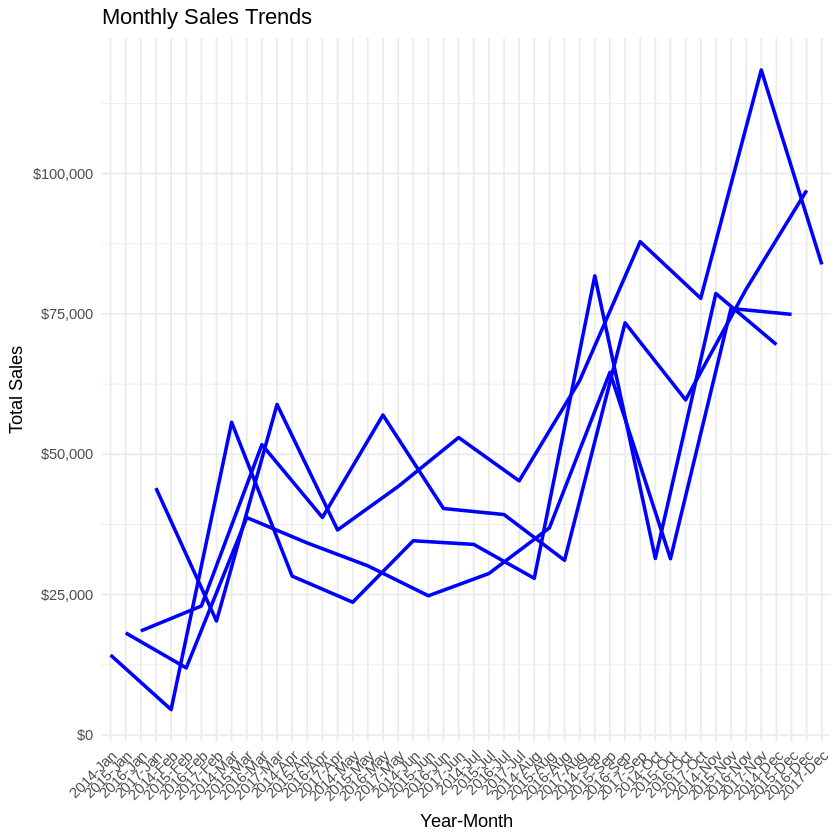

In [ ]:
# Aggregate Sales by Month and Year
monthly_sales <- sales_data %>%
  group_by(Year, Month) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

ggplot(monthly_sales, aes(x = interaction(Year, Month, sep = "-"), y = Total_Sales, group = Year)) +
  geom_line(color = "blue", size = 1) +
  labs(title = "Monthly Sales Trends", x = "Year-Month", y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = scales::dollar_format())


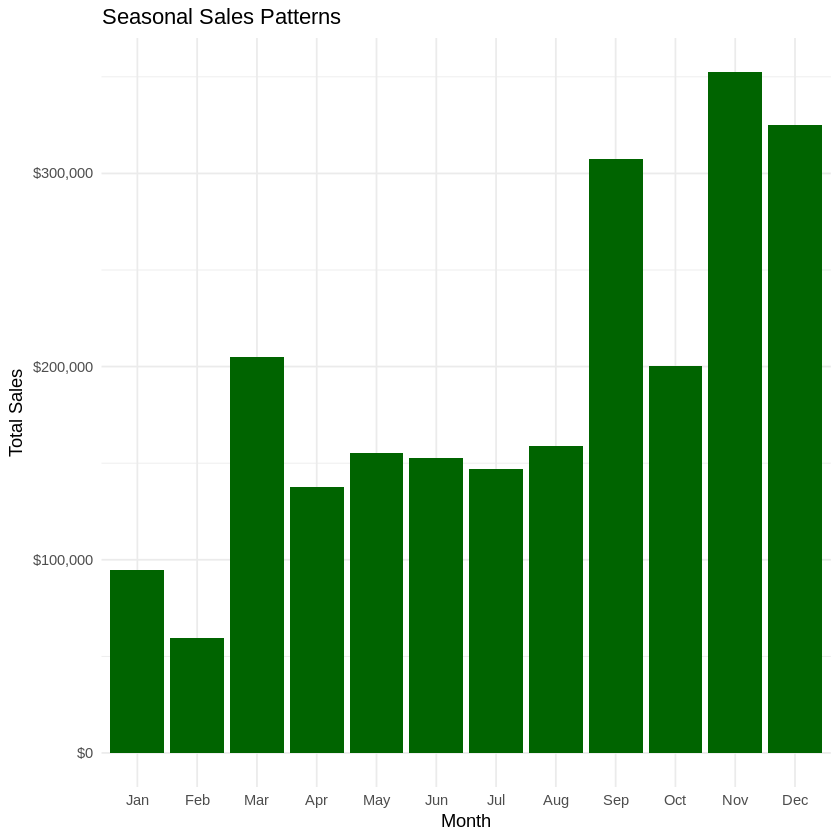

In [ ]:
# Seasonal Sales Patterns
seasonal_sales <- sales_data %>%
  group_by(Month) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE))

ggplot(seasonal_sales, aes(x = Month, y = Total_Sales)) +
  geom_bar(stat = "identity", fill = "darkgreen") +
  labs(title = "Seasonal Sales Patterns", x = "Month", y = "Total Sales") +
  theme_minimal() +
  scale_y_continuous(labels = scales::dollar_format())

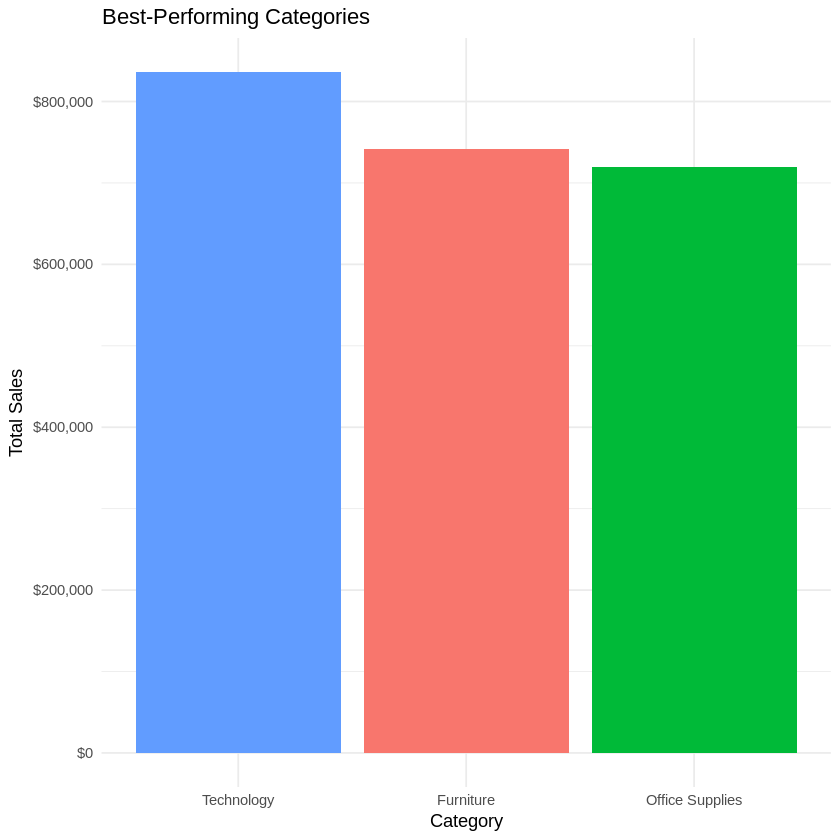

In [ ]:
# Best-Performing Categories
category_sales <- sales_data %>%
  group_by(Category) %>%
  summarise(Total_Sales = sum(Sales, na.rm = TRUE)) %>%
  arrange(desc(Total_Sales))

ggplot(category_sales, aes(x = reorder(Category, -Total_Sales), y = Total_Sales, fill = Category)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Best-Performing Categories", x = "Category", y = "Total Sales") +
  theme_minimal() +
  scale_y_continuous(labels = scales::dollar_format())